# Importing packages

Importamos los paquetes necesarios para el proyecto

In [1]:
from numpy import savetxt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

# Loading Data

Cargar los datos https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html


In [2]:
data = np.load('data/proyecto_training_data.npy')
names = ["SalePrice", "OverallQual","1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
df = pd.DataFrame(data=data,columns=names) 
df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
SalePrice       1460 non-null float64
OverallQual     1460 non-null float64
1stFlrSF        1460 non-null float64
TotRmsAbvGrd    1460 non-null float64
YearBuilt       1460 non-null float64
LotFrontage     1201 non-null float64
dtypes: float64(6)
memory usage: 68.6 KB


In [4]:
row_num = df.shape[0]
col_num = df.shape[1]
print('Number of rows', row_num)
print('Number of cols', col_num)

Number of rows 1460
Number of cols 6


# Slicing with Numpy

In [5]:
train_rows_num = int(row_num*0.8)
train_df = df[:train_rows_num]
test_df = df[:-train_rows_num]

# Exploratory analysis

## Boxplots

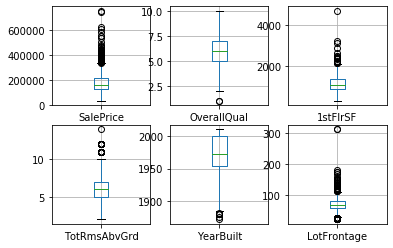

In [6]:
fig  = plt.figure()
i = 0
for column in df:
    i += 1
    fig.add_subplot(2,3,i)
    df.boxplot([column])
    
plt.show()


## Get values
> mean, max, min, range, std

In [7]:
for index in range(col_num):
    print(names[index])
    print(df.iloc[:,index].describe(),'\n')

SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64 

OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64 

1stFlrSF
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64 

TotRmsAbvGrd
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64 

YearBuilt
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973

## Graphing histograms 

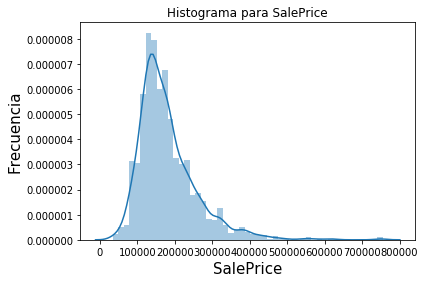

In [ ]:
i = 0

for column in df:
    x = np.array(df[column])
    x = x[~np.isnan(x)]
    concat_name = "Histograma para " + names[i]
    sns.distplot(x).set_title(concat_name)
    plt.xlabel(names[i], fontsize=15)
    plt.ylabel("Frecuencia",fontsize=15)
    plt.show()
    i += 1

## Graphing scatterplot with matplotlib

In [ ]:
i = 0
for column in df:
    if i != 0:
        corr_num = df['SalePrice'].corr(df[column])
        label = 'r =' + ' {0:.2f}'.format(corr_num)
        title = 'SalePrice vs ' + names[i] + ' ' + label   
        df.plot(x=names[i], y='SalePrice', kind='scatter',title=title, label=label,c = 'g') 
        plt.show()
        print()
    i += 1

## Create function for *linear regresion*

> Escojo **OverallQual** y **1stFlrSF** dependientes a **SalePrice**, los cuales tienen un r = 0.79 y 0.61 respectivamente

> Dataframe de entrenamiento **train_df** y de pruebas **test_df**

In [ ]:
def linear_regresion(x, y, epochs, imprimir_error_cada=-1, lr = 0.0001):
    l = len(x)
    m = 0
    b = 0
    parameters = np.array([[m,b]])
    
    errors = []
    models = []
    models.append([])
    models.append([])
    
    matrix_x_t = np.matrix([x, np.full_like(x,1)]).T
    for index in range(epochs):
        yhat = np.dot(matrix_x_t, parameters.T).T
        error = 0.5 * np.mean(np.power(y - yhat,2))
        
        errors.append(error)
        models[0].append(parameters[0,0]) #terminos m
        models[1].append(parameters[0,1]) #terminos b
        
        gradient = ((yhat - y) * matrix_x_t) / l
        parameters = parameters - gradient * lr

        if (index % imprimir_error_cada == 0) and (imprimir_error_cada != -1):
            print('Iteracion '+str(index+1)+ ': error= ' + str(round(error,2)) + \
                  ' m= ' + str(parameters[0,0])+ ' b= '+ str(parameters[0,1]))

    return models, errors 

### Comprobando la función con los valores de *ejemplo_regresion_proyecto.xlsx*

In [ ]:
x = np.array([65, 80, 68])
y = np.array([208.5, 181.5, 223.5])

m, e = linear_regresion(x,y,3,1)

## Create function: *error vs epoch graph*

In [ ]:
def error_graph(error):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    x = np.arange(1,len(error)+1)
    ax.plot(x, e ,color="c") # tambien se pudo usar "green" en lugar de el abreviado "g"
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Error')
    ax.set_title('Error vs epoch')
    plt.show()
    print('Final error: '+ '{:.4e}'.format(e[-1]))

In [ ]:
#Ejemplo de grafica de error con valores de ejemplo_regresion_proyecto.xlsx
x = np.array([65, 80, 68])
y = np.array([208.5, 181.5, 223.5])

m, e = linear_regresion(x,y,3,1)

error_graph(e)

## Create function: *graph lineal model by no. of epoch*

In [ ]:
def models_graph(x,y,m,n):
    x_vec = np.linspace(0,np.max(x),2)
    for i in range(1, len(m[0])+1, n):
        y_vec = m[0][i-1] * x_vec + m[1][i-1]
        y_str = 'y ='+ ' {0:.2f}'.format(m[0][i-1]) +'x + '+ '{0:.2f}'.format(m[1][i-1])
        plt.scatter(x,y, c='g', label=str(x.name))
        plt.plot(x_vec,y_vec,c='r', label=y_str, linewidth=3)
        plt.xlabel(str(x.name))
        plt.ylabel(str(y.name))
        plt.title('Epoch ' + str(i-1))
        plt.legend(loc='best')
        plt.show()

# Training with *MY* regresion model
- X's choosen:
    - OverallQual
    - 1stFlrSF

## OverallQual
### Method - linear_regresion()

In [ ]:
x = train_df['OverallQual'] 
y = train_df['SalePrice'] 

x_vec = np.array(x) 
y_vec = np.array(y) 

ep = 8000

m, e = linear_regresion(x_vec,y_vec,ep,lr=0.01)
error_graph(e)
models_graph(x,y,m,int(ep/3))

OverallQual_m = m[0][-1]
OverallQual_b = m[1][-1]

## 1stFlrSF
### Method - linear_regresion()

In [ ]:
x = train_df['1stFlrSF'] 
y = train_df['SalePrice'] 

x_vec = np.array(x) 
y_vec = np.array(y) 

ep = 100

m, e = linear_regresion(x_vec,y_vec,ep,lr=0.000001)
error_graph(e)
models_graph(x,y,m,int(ep/3))

IstFlrSF_m = m[0][-1]
IstFlrSF_b = m[1][-1]

# Training with *sklearn model*

## OverallQual and 1stFlrSF
### Method - sklearn LinearRegression

In [ ]:
over = pd.DataFrame(train_df['OverallQual'])
flrs = pd.DataFrame(train_df['1stFlrSF'])

sale = pd.DataFrame(train_df['SalePrice'])

regresion_over = LinearRegression().fit(over, sale)
regresion_flrs = LinearRegression().fit(flrs, sale)

## Create function: *3 prediction models*

In [ ]:
def all_models(x_eval, my_model, sk_model): #x_eval: es la columna del dataframe
    x_vec = np.array(x_eval)
    prediction_my = my_model[0]*x_vec+my_model[1]
    prediction_sk = sk_model.predict(pd.DataFrame(x_eval)).T
    prediction_sk = prediction_sk.reshape((-1,))
    prediction_mean = 0.5*(prediction_my + prediction_sk)
    return prediction_my, prediction_sk, prediction_mean

# Using test data with *all_models*

## OverallQual

In [ ]:
x = test_df['OverallQual'] 
p_my_ov, p_sk_ov, p_mn_ov = all_models(x,[OverallQual_m,OverallQual_b],regresion_over)
print('Manual:',p_my_ov[1:5])
print('Scikit:',p_sk_ov[1:5])
print('_Mean_:',p_mn_ov[1:5])

## 1stFlrSF

In [ ]:
x = test_df['1stFlrSF'] 
p_my_1st, p_sk_1st, p_mn_1st = all_models(x,[IstFlrSF_m,IstFlrSF_b],regresion_flrs)
print('Manual:',p_my_1st[1:5])
print('Scikit:',p_sk_1st[1:5])
print('_Mean_:',p_mn_1st[1:5])

# Error graph *all_models*

In [ ]:
def error_estimation(y,yhat):
    return 0.5*np.mean(np.power((y-yhat),2))

#Valor real y
y = test_df['SalePrice']
y_vec = np.array(y)

#Errores OverallQual
e_my_ov = error_estimation(y,p_my_ov) #Error de predicción manual
e_sk_ov = error_estimation(y,p_sk_ov) #Error de predicción sklearn
e_mn_ov = error_estimation(y,p_mn_ov) #Error de predicción promedio
#Errores 1stFlrSF
e_my_1st = error_estimation(y,p_my_1st)
e_sk_1st = error_estimation(y,p_sk_1st)
e_mn_1st = error_estimation(y,p_mn_1st)

In [ ]:
#Ejemplo base para esta gráfica: https://python-graph-gallery.com/11-grouped-barplot/

# Configurar el ancho de las barras
barWidth = 0.2
 
# Configurar barras
bars1 = [e_my_ov, e_my_1st]
bars2 = [e_sk_ov, e_sk_1st]
bars3 = [e_mn_ov, e_mn_1st]
 
# Configurar la posición de las barras en el eje X
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Graficar barras
plt.bar(r1, bars1, color='darkorange', width=barWidth, edgecolor='white', label='Manual')
plt.bar(r2, bars2, color='limegreen', width=barWidth, edgecolor='white', label='Sklearn')
plt.bar(r3, bars3, color='darkorchid', width=barWidth, edgecolor='white', label='Mean')
 
plt.xlabel('Errors', fontweight='bold')

# Agregar en el eje X nombre de las variables
plt.xticks([r + barWidth for r in range(len(bars1))], ['OverallQual', '1stFlrSF'])
 
plt.legend()
plt.show()

### Errores de OverallQual con los diferentes modelos

In [ ]:
print('Error manual_ = {:.4e}'.format(e_my_ov))
print('Error sklearn = {:.4e}'.format(e_sk_ov))
print('Error mean___ = {:.4e}'.format(e_mn_ov))

# Conclusión

El mejor modelo es el **OverallQual** con ***Sklearn***. El proceso de selección fué el siguiente:

- Error OverallQual < 1stFlrSF, para cualquier caso
    - Escogemos OverallQual, en la gráfica no se puede notar una diferencia significativa, así que imprimimos los errores en formato científico para cada modelo
        - Estogemos sklearn por presentar la cifra más pequeña de los tres modelos